<a href="https://colab.research.google.com/github/rizkyaryendigumilang/notes_materi-MS/blob/main/Descriptive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [ ]:
import numpy as np #library untuk matematika
import pandas as pd #library untuk dataframe
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt

### Load data


In [ ]:
dataset = sns.load_dataset("titanic")

## Memahami data yang dimilkki


In [ ]:
#Melihat 5 data pertama untuk mendapatkan gamabran data yang dimiliki
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Melihat informasi tipe data, missing values (data hilang), memori, banyak data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Tipe data

**Data Kategorik**:

**Nominal**

- Binary
  - *sex*
  - *survival* -> *alive*
  - *adult_male*
  - *alone*
- Multi
  - *embark* -> *embark_town*

**Ordinal**

- *pclass* -> *class*  

**Data Numerik**:
- *age*
-	*sibsp*
- *parch*



## Tendensi Pemusatan

### Frekuensi dan proporsi

In [ ]:
#Menghitung frekuensi
dataset.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
#Menghitung proporsi
dataset.embark_town.value_counts(normalize = True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

### Modus, Median, Mean

In [ ]:
#Menghitung modus
modus = dataset["fare"].mode().values
print(f"Modus  = {modus} (bisa lebih dari satu nilai atau bimodus)" )

#Menghitung median
median = dataset["fare"].median()
print(f"Median = {median}")

#Memghitung mean
mean = dataset["fare"].mean()
print(f"Mean   = {mean}")

Modus  = [8.05] (bisa lebih dari satu nilai atau bimodus)
Median = 14.4542
Mean   = 32.204207968574636


In [ ]:
#Menghitung modus
modus = dataset["age"].mode().values
print(f"Modus  = {modus} (bisa lebih dari satu nilai atau bimodus)" )

#Menghitung median
median = dataset["age"].median()
print(f"Median = {median}")

#Memghitung mean
mean = dataset["age"].mean()
print(f"Mean   = {mean}")

Modus  = [24.] (bisa lebih dari satu nilai atau bimodus)
Median = 28.0
Mean   = 29.69911764705882


## Tendensi Penyebaran

### Variance dan Standard Deviasi

In [ ]:
#Menghitung var
var = dataset["fare"].var()
print(f"Variance  = {var}")

#Menghitung median
std = dataset["fare"].std()
print(f"Standard Deviasi = {std}")

#Apakah sama?
print(np.sqrt(var) == std)

Variance  = 2469.436845743116
Standard Deviasi = 49.6934285971809
True


### Statistik Lima Serangkai

In [ ]:
#Menghitung var
minimum = dataset["fare"].min()
print(f"Nilai minimum   = {minimum}")

Q1 = dataset["fare"].quantile(0.25)
print(f"Nilai Q1        = {Q1}")

Q2 = dataset["fare"].quantile(0.5)
print(f"Nilai Q2        = {Q2}")

Q3 = dataset["fare"].quantile(0.75)
print(f"Nilai Q3        = {Q3}")

maksimum = dataset["fare"].max()
print(f"Nilai maksimum  = {maksimum}")

Nilai minimum   = 0.0
Nilai Q1        = 7.9104
Nilai Q2        = 14.4542
Nilai Q3        = 31.0
Nilai maksimum  = 512.3292


### Jangkauan, IQR, dan Persentil

In [ ]:
jangkauan = maksimum - minimum
print(f"Nilai jangkauan = {jangkauan}")

iqr = Q3 - Q1
print(f"Nilai IQR  = {iqr}")

#Persentil 50 = Median
print(median == Q2)

#Persentil 0 = Minimum dan Persentil 100 = Maksimum
print(minimum == dataset["fare"].quantile(0))
print(maksimum == dataset["fare"].quantile(1))

Nilai jangkauan = 512.3292
Nilai IQR  = 23.0896
False
True
True


## Outliers, Boxplot, dan Histogram

### Outliers

In [ ]:
batas_bawah = Q1 - 1.5 * iqr
batas_atas = Q3 + 1.5 * iqr

In [ ]:
print(f"outliers minior < {batas_bawah}")
print(f"outliers mayor > {batas_atas}")

outliers minior < -26.724
outliers mayor > 65.6344


### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


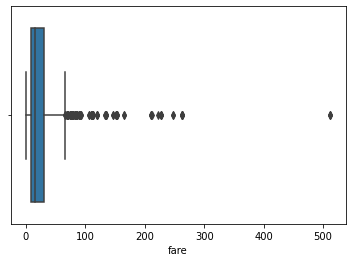

In [ ]:
#Membuat boxplot
sns.boxplot(dataset["fare"])
plt.show()

### Histogram

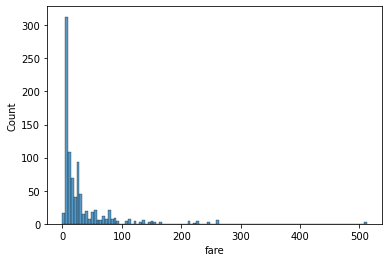

In [ ]:
sns.histplot(dataset["fare"])
plt.show()